# Compare ML inference techniques

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import duckdb

In [2]:
con = duckdb.connect("../test.db")
times = con.sql(f"SELECT * FROM times").df()
con.close()

In [3]:
data = times.drop(columns=['dataset', 'ts']).melt(id_vars=['pipeline', 'workload'], value_vars=['move', 'load', 'predict'], var_name='phase', value_name='time')
data

,pipeline,workload,phase,time
0,duckdb_python,1000000,move,66407
1,duckdb_python,1000000,move,69000
2,duckdb_python,1000000,move,87882
3,duckdb_python,1000000,move,66269
4,duckdb_python,1000000,move,75381
...,...,...,...,...
430,opt_vec_V3,1000000,predict,534324
431,opt_vec_V3,5000000,predict,2507371
432,opt_vec_V3,10000000,predict,4952802
433,opt_vec_V3,15000000,predict,7231544


In [38]:
sliced = pd.DataFrame(data[data['pipeline'].isin(['traditonal', 'python_udf_vec', 'opt_vec', 'opt_vec_V3'])])
sliced['pipeline'] = sliced['pipeline'].apply(lambda x: 'opt_vec_V2' if x == 'opt_vec_V3' else x)

([0, 1, 2, 3],
 [Text(0, 0, 'traditonal'),
  Text(1, 0, 'python_udf_vec'),
  Text(2, 0, 'opt_vec'),
  Text(3, 0, 'opt_vec_V2')])

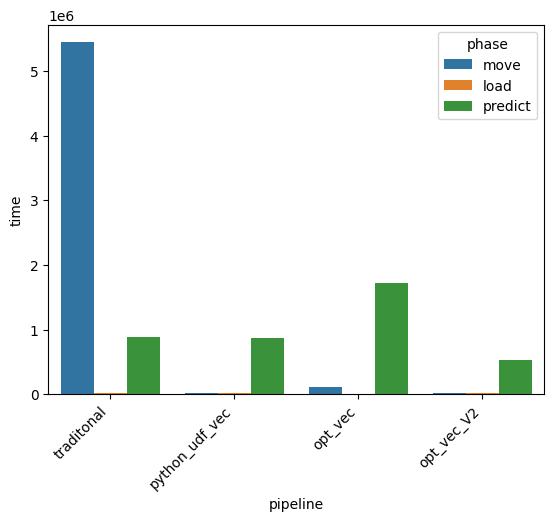

In [39]:
sns.barplot(sliced[sliced.workload == 1000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3],
 [Text(0, 0, 'traditonal'),
  Text(1, 0, 'python_udf_vec'),
  Text(2, 0, 'opt_vec'),
  Text(3, 0, 'opt_vec_V2')])

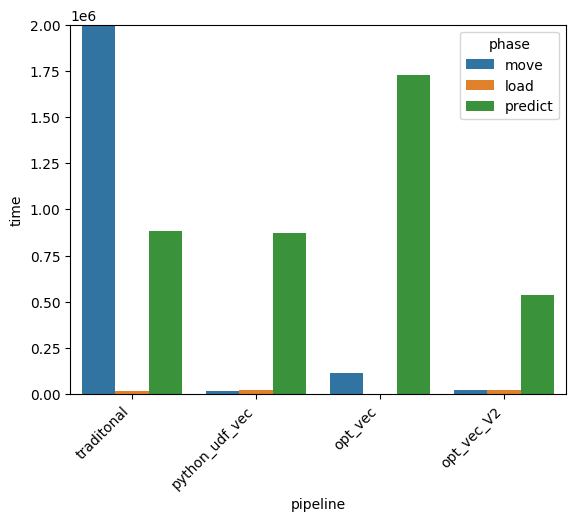

In [40]:
# test = data#[(data.pipeline == 'opt_vec') | (data.pipeline == 'duckdb_python')]
sns.barplot(sliced[sliced.workload == 1000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 2000000)
plt.xticks(rotation=45, ha='right')


([0, 1, 2, 3],
 [Text(0, 0, 'traditonal'),
  Text(1, 0, 'python_udf_vec'),
  Text(2, 0, 'opt_vec'),
  Text(3, 0, 'opt_vec_V2')])

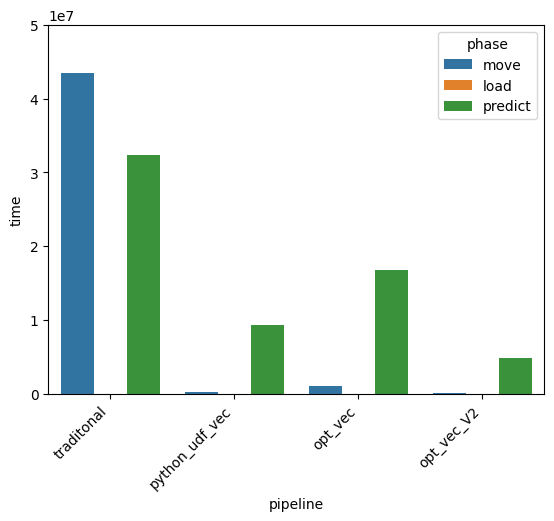

In [41]:
sns.barplot(sliced[sliced.workload == 10000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 50000000)
plt.xticks(rotation=45, ha='right')


([0, 1, 2, 3],
 [Text(0, 0, 'traditonal'),
  Text(1, 0, 'python_udf_vec'),
  Text(2, 0, 'opt_vec'),
  Text(3, 0, 'opt_vec_V2')])

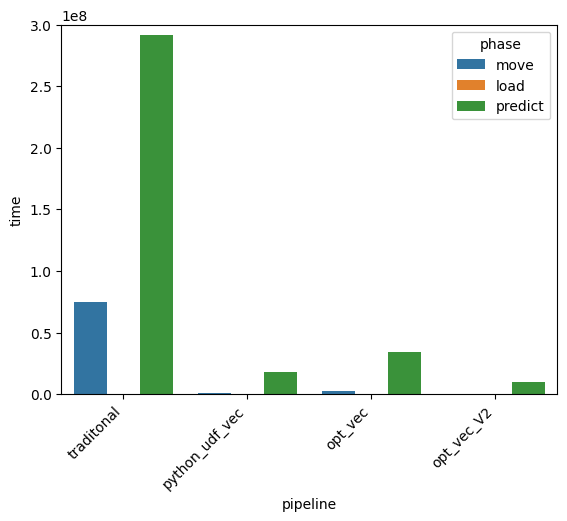

In [42]:
sns.barplot(sliced[sliced.workload == 20000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 300000000)
plt.xticks(rotation=45, ha='right')


In [9]:
summary = times.drop(columns=['dataset', 'ts'])
summary['inference'] = summary['predict'] + summary['load']
summary['total'] = summary['inference'] + summary['move']

summary = summary[~(summary.pipeline == 'opt')]
summary = summary[~(summary.pipeline == 'opt_vec')]
summary = summary[~(summary.pipeline == 'opt_vec_scalar')]

summary['pipeline'] = summary['pipeline'].apply(lambda x: 'python_udf_vec|d3-w128' if x == 'python_udf_vec|d5-w128' else x)
summary['pipeline'] = summary['pipeline'].apply(lambda x: 'opt_vec|d3-w128' if x == 'opt_vec|w3-d128' else x)
summary['pipeline'] = summary['pipeline'].apply(lambda x: 'opt_vec' if x == 'opt_vec3' else x)
summary['pipeline'] = summary['pipeline'].apply(lambda x: 'opt_vec_V2' if x == 'opt_vec_V3' else x)
summary = summary[~(summary['pipeline'] == 'opt_vec2') & (summary['workload'] >= 1000000)]
summary

,workload,move,load,predict,pipeline,inference,total
0,1000000,66407,11404,644862,duckdb_python,656266,722673
1,1000000,69000,14205,711004,duckdb_python,725209,794209
2,1000000,87882,15013,714544,duckdb_python,729557,817439
3,1000000,66269,14332,696981,duckdb_python,711313,777582
4,1000000,75381,14991,691012,duckdb_python,706003,781384
...,...,...,...,...,...,...,...
140,1000000,21060,24716,534324,opt_vec_V2,559040,580100
141,5000000,115323,24716,2507371,opt_vec_V2,2532087,2647410
142,10000000,221590,24716,4952802,opt_vec_V2,4977518,5199108
143,15000000,311175,24716,7231544,opt_vec_V2,7256260,7567435


In [10]:
summary['pipeline'].drop_duplicates()

0               duckdb_python
25                 python_udf
32                 traditonal
45             python_udf_vec
70     python_udf_vec|d3-w128
75     python_udf_vec|d5-w512
78                    opt_vec
80            opt_vec|w5-d512
86            opt_vec|d3-w128
140                opt_vec_V2
Name: pipeline, dtype: object

(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

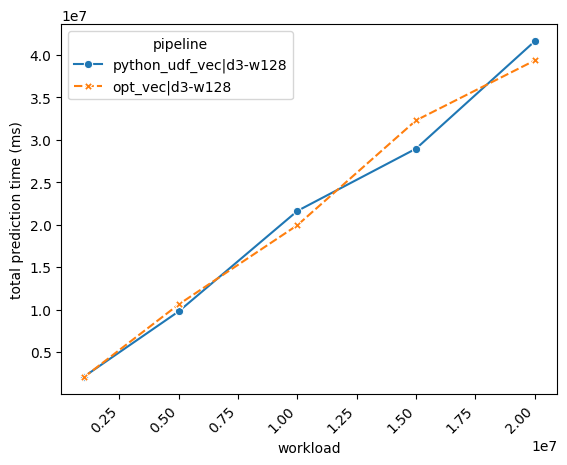

In [11]:
fil = ['python_udf_vec|d3-w128', 'opt_vec|d3-w128']
subsum = summary[summary['pipeline'].isin(fil)]

sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=subsum)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

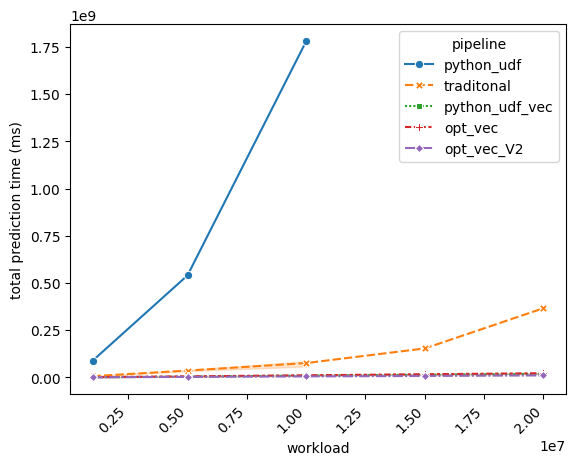

In [12]:
fil = ['python_udf', 'traditonal', 'python_udf_vec', 'opt_vec', 'opt_vec_V2', 'opt_vec_V3']
subsum = summary[summary['pipeline'].isin(fil)]

sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=subsum)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

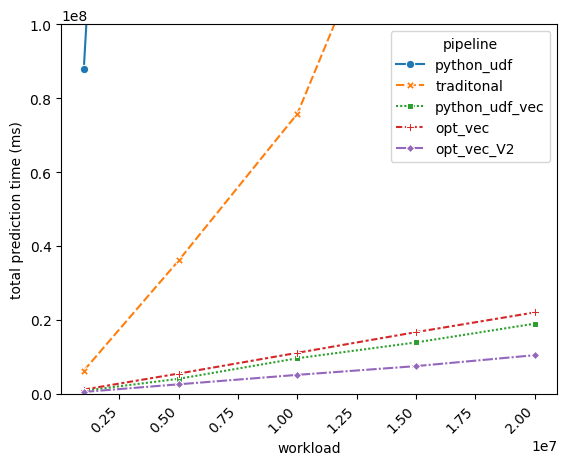

In [13]:
sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=subsum, errorbar=None)
plt.ylim(0, 100000000)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

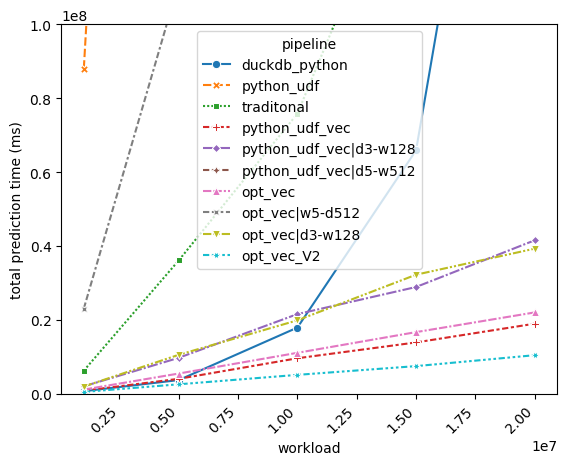

In [14]:
sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=summary, errorbar=None)
plt.ylim(0, 100000000)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')
